주제 : 파킨슨병 여부를 음성 주파수 특징으로 분류하기 위한 의사결정나무모델 학습과 시각화 (음성 특징(주파수)으로 파킨슨병 환자와 건강인을 분류)

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # 데이터 분류 시각화하기 
from sklearn.model_selection import cross_val_score # 교차 검증 통해 모델의 성능 평가하는 함수 사용
from sklearn import tree # 결정트리 모델 시각화
# 데이터셋 로드
pk = pd.read_csv('parkinsons.data')
pk


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


c:\Users\12345\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12345\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12345\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12345\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12345\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

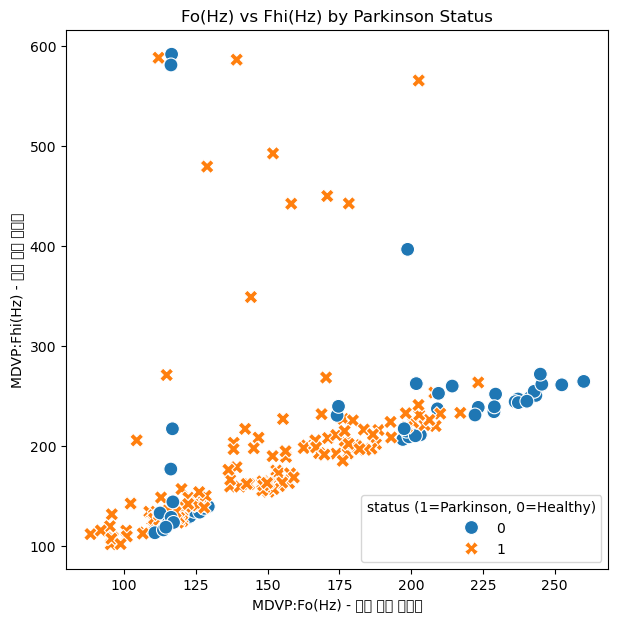

In [2]:
# scatter plot 사용 -> 평균 기초 주파수와 최대 기초 주파수 간의 관계를 시각화
# 파킨슨병 여부에 따라 색상과 모양을 다르게 표시
import seaborn as sns

## x='MDVP:Fo(Hz)' (평균 기초 주파수) / y='MDVP:Fhi(Hz)' (최대 기초 주파수) / hue='status' (파킨슨병 여부, 1: 파킨슨병, 0: 건강) / style='status' (파킨슨병 여부에 따라 모양을 달리하기)
plt.figure(figsize=(7, 7))
sns.scatterplot(x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', hue='status', style='status', s=100, data=pk)
# -> x축에 평균 기초 주파수 데이터를 사용, y축에 최대 기초 주파수 데이터를 사용, 색깔과 모양도 다르게 지정, pk 데이터 프레임 사용
plt.title('Fo(Hz) vs Fhi(Hz) by Parkinson Status')
plt.xlabel('MDVP:Fo(Hz) - 평균 기초 주파수')
plt.ylabel('MDVP:Fhi(Hz) - 최대 기초 주파수')
plt.legend(title='status (1=Parkinson, 0=Healthy)')
plt.show()

In [10]:
# 1. sklearn.tree 메소드를 사용해서 의사결정나무 모델 훈련 -> 질문들로 분류해 파킨슨병 환자와 비환자를 구분 작업을 수행
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, cross_val_score  # train_test_split 임포트 필요
# from sklearn import tree  # (plot_tree 쓸 때만 필요)

# 2. 입력/정답
feat_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']
X = pk[feat_names]
y = pk['status']

# 3. 학습/테스트 분할 (라벨 비율 유지)
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=1004, stratify=y
)
# 4. 모델 학습
dt_clf = DecisionTreeClassifier(random_state=1004)
dt_clf.fit(X_tr, y_tr)

# 5. 피처 중요도 (특성의 기여도이지, '파킨슨 확률'이 아님)
print("\n[Feature Importances]")
for name, val in zip(feat_names, dt_clf.feature_importances_):
    print(f"{name}: {val:.3f}")

# 6. 트리 규칙(텍스트)
print("\n[Decision Tree Rules]")
print(export_text(dt_clf, feature_names=feat_names))


[Feature Importances]
MDVP:Fo(Hz): 0.646
MDVP:Fhi(Hz): 0.354

[Decision Tree Rules]
|--- MDVP:Fo(Hz) <= 219.68
|   |--- MDVP:Fo(Hz) <= 195.05
|   |   |--- MDVP:Fo(Hz) <= 132.85
|   |   |   |--- MDVP:Fo(Hz) <= 112.35
|   |   |   |   |--- class: 1
|   |   |   |--- MDVP:Fo(Hz) >  112.35
|   |   |   |   |--- MDVP:Fhi(Hz) <= 123.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- MDVP:Fhi(Hz) >  123.42
|   |   |   |   |   |--- MDVP:Fhi(Hz) <= 530.49
|   |   |   |   |   |   |--- MDVP:Fo(Hz) <= 126.24
|   |   |   |   |   |   |   |--- MDVP:Fhi(Hz) <= 167.30
|   |   |   |   |   |   |   |   |--- MDVP:Fo(Hz) <= 112.71
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- MDVP:Fo(Hz) >  112.71
|   |   |   |   |   |   |   |   |   |--- MDVP:Fhi(Hz) <= 130.16
|   |   |   |   |   |   |   |   |   |   |--- MDVP:Fo(Hz) <= 121.22
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- MDVP:Fo(Hz) >  1

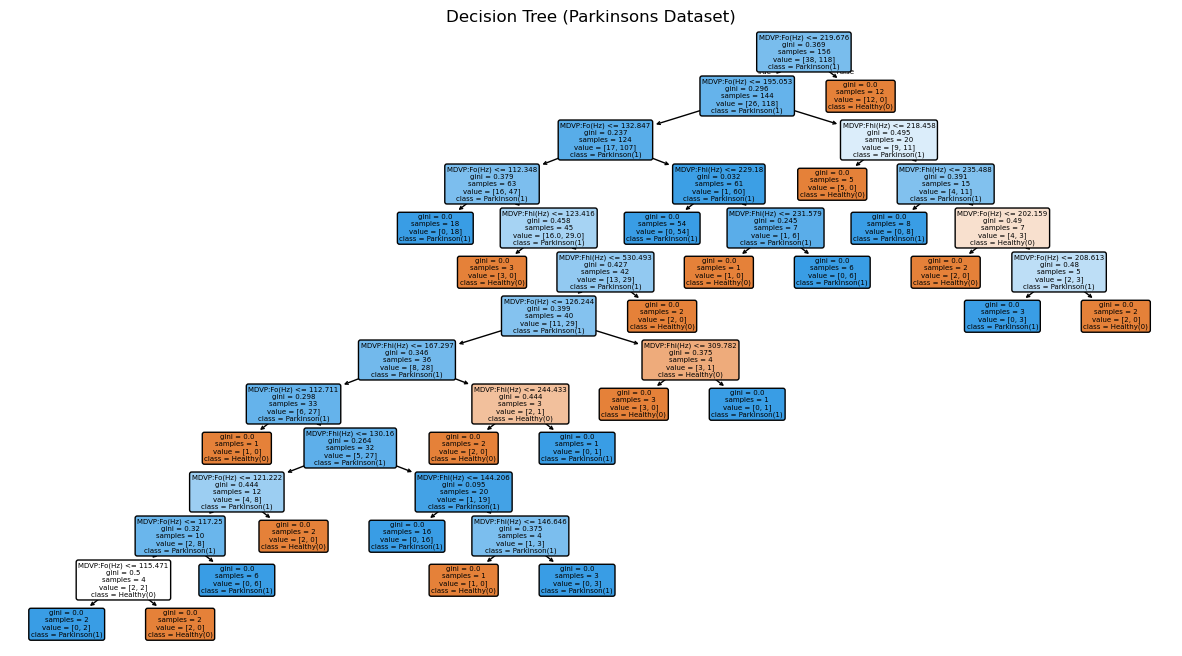

In [ ]:
# 시각화
plt.figure(figsize=(15, 8))
tree.plot_tree(
    dt_clf,
    feature_names=feat_names,               # 실제 특성 이름
    class_names=['Healthy(0)', 'Parkinson(1)'], # 라벨 이름
    filled=True,
    rounded=True
)
plt.title("Decision Tree (Parkinsons Dataset)")
plt.show()


In [15]:
# 테스트셋 정확도
test_acc = dt_clf.score(X_te, y_te)
print(f"[Test Accuracy] {test_acc:.3f}")
# 정밀도/ 재현율/ F1-score
from sklearn.metrics import classification_report
y_pred = dt_clf.predict(X_te) 
print(classification_report(y_te, y_pred,
                            target_names=['Healthy(0)', 'Parkinson(1)']))

[Test Accuracy] 0.821
              precision    recall  f1-score   support

  Healthy(0)       0.64      0.70      0.67        10
Parkinson(1)       0.89      0.86      0.88        29

    accuracy                           0.82        39
   macro avg       0.76      0.78      0.77        39
weighted avg       0.83      0.82      0.82        39

